In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [29]:
data=pd.read_csv('fundamentals.csv')
data.drop(['Unnamed: 0','Ticker Symbol','Period Ending'],axis=1,inplace=True)

In [30]:
data.head()

,Accounts Payable,Accounts Receivable,Add'l income/expense items,After Tax ROE,Capital Expenditures,Capital Surplus,Cash Ratio,Cash and Cash Equivalents,Changes in Inventories,Common Stocks,...,Total Current Assets,Total Current Liabilities,Total Equity,Total Liabilities,Total Liabilities & Equity,Total Revenue,Treasury Stock,For Year,Earnings Per Share,Estimated Shares Outstanding
0,3.068000e+09,-222000000.0,-1.961000e+09,23.0,-1.888000e+09,4.695000e+09,53.0,1.330000e+09,0.0,127000000.0,...,7.072000e+09,9.011000e+09,-7.987000e+09,2.489100e+10,1.690400e+10,2.485500e+10,-367000000.0,2012.0,-5.60,3.350000e+08
1,4.975000e+09,-93000000.0,-2.723000e+09,67.0,-3.114000e+09,1.059200e+10,75.0,2.175000e+09,0.0,5000000.0,...,1.432300e+10,1.380600e+10,-2.731000e+09,4.500900e+10,4.227800e+10,2.674300e+10,0.0,2013.0,-11.25,1.630222e+08
2,4.668000e+09,-160000000.0,-1.500000e+08,143.0,-5.311000e+09,1.513500e+10,60.0,1.768000e+09,0.0,7000000.0,...,1.175000e+10,1.340400e+10,2.021000e+09,4.120400e+10,4.322500e+10,4.265000e+10,0.0,2014.0,4.02,7.169154e+08
3,5.102000e+09,352000000.0,-7.080000e+08,135.0,-6.151000e+09,1.159100e+10,51.0,1.085000e+09,0.0,6000000.0,...,9.985000e+09,1.360500e+10,5.635000e+09,4.278000e+10,4.841500e+10,4.099000e+10,0.0,2015.0,11.39,6.681299e+08
4,2.409453e+09,-89482000.0,6.000000e+05,32.0,-2.711820e+08,5.202150e+08,23.0,5.981110e+08,-260298000.0,7000.0,...,3.184200e+09,2.559638e+09,1.210694e+09,3.403120e+09,4.613814e+09,6.205003e+09,-27095000.0,2012.0,5.29,7.328355e+07


In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1781 entries, 0 to 1780
Data columns (total 76 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Accounts Payable                                     1781 non-null   float64
 1   Accounts Receivable                                  1781 non-null   float64
 2   Add'l income/expense items                           1781 non-null   float64
 3   After Tax ROE                                        1781 non-null   float64
 4   Capital Expenditures                                 1781 non-null   float64
 5   Capital Surplus                                      1781 non-null   float64
 6   Cash Ratio                                           1482 non-null   float64
 7   Cash and Cash Equivalents                            1781 non-null   float64
 8   Changes in Inventories                               1781 non-null  

In [42]:
from sklearn.decomposition import PCA
data.dropna(inplace=True)

In [82]:
pca=PCA(n_components=35)

In [83]:
from sklearn.preprocessing import StandardScaler

In [84]:
scaler=StandardScaler()

In [85]:
scaler.fit(data)

StandardScaler()

In [112]:
scaled=scaler.transform(data)

In [127]:
pca.fit(scaled)

PCA(n_components=35)

In [128]:
pca_scaled=pca.transform(scaled)

In [98]:
variance_values = pca.explained_variance_ratio_.tolist()
variance_values=np.array(variance_values)

In [99]:
# ind = np.argpartition(variance_values, -10)[-10:]
# top10 = variance_values[ind]

# sum(top10)

In [100]:
import matplotlib.pyplot as plt

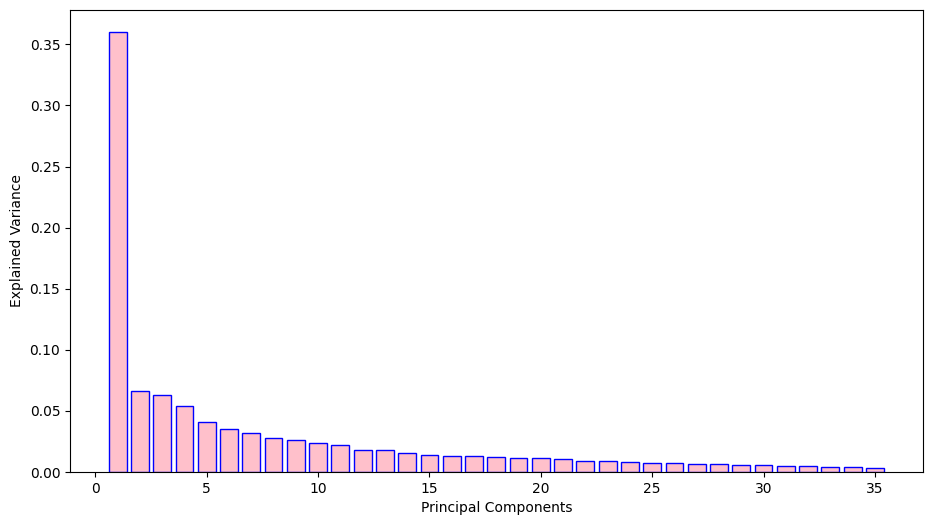

In [101]:
plt.figure(figsize=(11,6))
plt.bar(x=[i for i in range(1,36)], height=variance_values, color="pink", edgecolor="blue")
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance')
plt.show()

In [131]:
projected_data=pd.DataFrame(pca_scaled)
projected_data

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
0,-1.071280,-1.735033,0.440587,-1.848618,0.116315,-1.899137,0.691501,-0.750351,-0.484506,0.545283,...,1.507122,0.237568,0.334515,0.340676,-0.174323,0.781741,-0.228919,-0.395152,0.073631,-0.475838
1,0.104905,-2.223449,1.845118,-2.478943,0.181924,-1.997260,1.221094,-0.204010,-0.647569,1.586265,...,1.855323,-0.218018,-0.407530,0.107825,-0.460127,0.941021,-0.822418,-0.387468,0.587285,-0.253292
2,2.195860,-1.370307,0.120198,-1.038890,-0.277063,-1.025378,1.142002,-1.025450,0.574087,0.682872,...,1.531114,-0.297247,-0.193295,-0.258713,-0.687290,0.256727,-1.175421,-0.813268,-0.838789,0.686767
3,3.164807,-0.545270,0.056919,-0.919476,-0.459458,-0.666455,1.190831,-0.173946,1.026156,-0.062074,...,1.616996,-0.140503,-0.737374,-0.495123,-0.122061,-0.319202,-2.236690,-1.964993,-1.197315,-0.628823
4,-2.300485,0.309447,-1.166761,-0.364088,-0.558708,-0.428217,-0.351233,0.370104,-0.183375,0.029613,...,-0.002660,0.006144,0.054205,-0.006517,0.160526,0.087868,0.252096,0.000895,0.033101,0.023340
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1294,-2.016448,0.842682,0.854256,1.021997,0.740296,1.583705,0.013473,-0.889981,-0.102818,0.057348,...,0.004255,-0.152183,-0.002582,0.164037,0.033279,0.282205,-0.086623,-0.295251,0.108548,-0.239033
1295,-1.104969,-0.785718,1.190509,-1.201158,0.607096,1.861175,0.872438,-0.027156,0.005551,0.007051,...,0.132182,-0.921155,-0.918614,1.246826,0.042358,0.351845,-0.251787,0.170734,0.068682,-0.052272
1296,-1.850582,0.181347,0.538379,-0.114063,-0.846526,0.775422,-1.164191,0.310771,-0.077913,0.292708,...,-0.496941,-1.170341,-0.322282,-1.145471,-0.130566,-0.749087,-0.092048,-0.826802,0.009493,0.768800
1297,-2.260930,0.435181,0.247183,0.530290,0.291141,0.615981,-0.023873,-0.327573,-0.026007,0.136045,...,0.531320,-0.310673,-0.068237,0.110798,-0.137098,-0.023728,0.167689,0.224066,-0.009982,0.025122


In [156]:
label=pd.read_csv('prices.csv')

In [157]:
label.drop(['date','symbol'],axis=1,inplace=True)

In [158]:
label=label[:1299]
label

,open,close,low,high,volume
0,123.430000,125.839996,122.309998,126.250000,2163600.0
1,125.239998,119.980003,119.940002,125.540001,2386400.0
2,116.379997,114.949997,114.930000,119.739998,2489500.0
3,115.480003,116.620003,113.500000,117.440002,2006300.0
4,117.010002,114.970001,114.089996,117.330002,1408600.0
...,...,...,...,...,...
1294,26.190001,26.420000,26.190001,26.469999,1570100.0
1295,36.540001,35.279999,35.220001,36.540001,5333000.0
1296,47.529999,47.330002,47.060001,47.750000,6270400.0
1297,42.730000,42.700001,42.560001,43.330002,3046500.0


In [159]:
scaler.fit(label)

StandardScaler()

In [160]:
scaled_label=scaler.transform(label)

In [161]:
l_pca=PCA(n_components=1)
l_pca.fit(scaled_label)

PCA(n_components=1)

In [162]:
projected_label=l_pca.transform(scaled_label)

In [163]:
projected_label=projected_label.ravel()


In [164]:
from sklearn.linear_model import LinearRegression

In [191]:
from sklearn.model_selection import train_test_split

In [192]:
X_train, X_test, y_train, y_test =train_test_split(projected_data,projected_label,test_size=0.2,random_state=42)

In [168]:
linear=LinearRegression()

In [169]:
linear.fit(X_train,y_train)

LinearRegression()

In [170]:
linear_pred=linear.predict(X_test)

In [171]:
linear.score(projected_data,projected_label)

0.05248830131093918

In [172]:
from sklearn.ensemble import RandomForestRegressor

In [193]:
forest=RandomForestRegressor()

In [194]:
forest.fit(X_train,y_train)

RandomForestRegressor()

In [195]:
forest.score(projected_data,projected_label)

0.6744432311963391